In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
tf.__version__

'2.8.0'

# 1. 資料準備

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_img_train,y_label_train),\
(x_img_test,y_label_test)=cifar10.load_data() 

170508288/170498071 [==============================] - 13s 0us/step


In [ ]:
y_label_train=y_label_train.reshape(-1)
y_label_test=y_label_test.reshape(-1)

In [ ]:
print("train data:",'images:',x_img_train.shape,"labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ," labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3) labels: (50000,)
test  data: images: (10000, 32, 32, 3)  labels: (10000,)


In [ ]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [ ]:
from tensorflow.keras import utils
y_label_train_OneHot = utils.to_categorical(y_label_train)
y_label_test_OneHot = utils.to_categorical(y_label_test)

In [ ]:
print("train data:",'images:',x_img_train_normalize.shape,
      " labels:",y_label_train_OneHot.shape) 
print("test  data:",'images:',x_img_test_normalize.shape ,
      " labels:",y_label_test_OneHot.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 10)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 10)


# 建立模型

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Activation, Flatten

In [ ]:
def create_model():
  model = Sequential()
  model.add(Conv2D(filters=32,kernel_size=(3,3),
                  input_shape=(32, 32,3),name='c1',
                  activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2),name='p1'))
  model.add(Conv2D(filters=64, kernel_size=(3, 3),name='c2', 
                  activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2),name='p2'))
  model.add(Flatten(name='flatten'))
  model.add(Dense(128, activation='relu',name='h1'))
  model.add(Dense(10, activation='softmax',name='out'))
  return model

In [ ]:
model = create_model()

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 c1 (Conv2D)                 (None, 32, 32, 32)        896       
                                                                 
 p1 (MaxPooling2D)           (None, 16, 16, 32)        0         
                                                                 
 c2 (Conv2D)                 (None, 16, 16, 64)        18496     
                                                                 
 p2 (MaxPooling2D)           (None, 8, 8, 64)          0         
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 h1 (Dense)                  (None, 128)               524416    
                                                                 
 out (Dense)                 (None, 10)                1

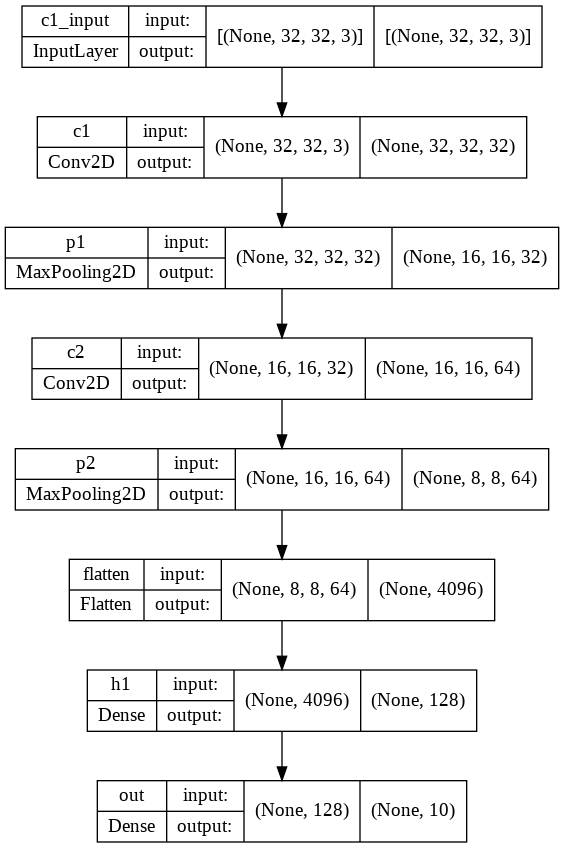

In [ ]:
tf.keras.utils.plot_model(model, 'cifarcnn.png', show_shapes=True)

# 訓練模型

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['acc'])

In [ ]:
train_history=model.fit(
    x_img_train_normalize,
    y_label_train_OneHot,
    validation_split=0.2,
    epochs=10, 
    batch_size=200, 
    verbose=2)          

Epoch 1/10
200/200 - 13s - loss: 1.6024 - acc: 0.4243 - val_loss: 1.3459 - val_acc: 0.5221 - 13s/epoch - 63ms/step
Epoch 2/10
200/200 - 2s - loss: 1.2333 - acc: 0.5637 - val_loss: 1.1946 - val_acc: 0.5789 - 2s/epoch - 8ms/step
Epoch 3/10
200/200 - 2s - loss: 1.0907 - acc: 0.6193 - val_loss: 1.0644 - val_acc: 0.6342 - 2s/epoch - 8ms/step
Epoch 4/10
200/200 - 2s - loss: 0.9975 - acc: 0.6541 - val_loss: 1.0369 - val_acc: 0.6457 - 2s/epoch - 8ms/step
Epoch 5/10
200/200 - 2s - loss: 0.9231 - acc: 0.6788 - val_loss: 0.9656 - val_acc: 0.6698 - 2s/epoch - 8ms/step
Epoch 6/10
200/200 - 2s - loss: 0.8672 - acc: 0.6997 - val_loss: 0.9263 - val_acc: 0.6793 - 2s/epoch - 8ms/step
Epoch 7/10
200/200 - 1s - loss: 0.8074 - acc: 0.7215 - val_loss: 0.9056 - val_acc: 0.6883 - 1s/epoch - 7ms/step
Epoch 8/10
200/200 - 2s - loss: 0.7632 - acc: 0.7363 - val_loss: 0.9204 - val_acc: 0.6808 - 2s/epoch - 8ms/step
Epoch 9/10
200/200 - 1s - loss: 0.7341 - acc: 0.7455 - val_loss: 0.8812 - val_acc: 0.6993 - 1s/epoch 

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train_key,valid_key):
    plt.plot(train_history.history[train_key],'--')
    plt.plot(train_history.history[valid_key])
    plt.title('Train History')
    plt.ylabel(train_key)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

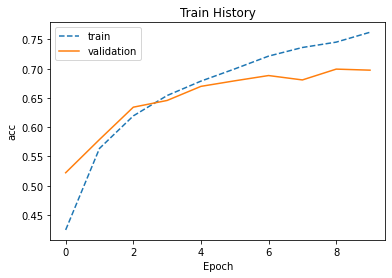

In [ ]:
show_train_history(train_history,'acc','val_acc')

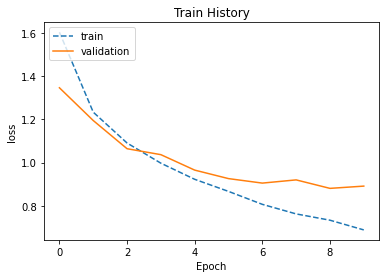

In [ ]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [ ]:
scores = model.evaluate(x_img_test_normalize,y_label_test_OneHot)

313/313 [==============================] - 1s 3ms/step - loss: 0.8956 - acc: 0.7009


In [ ]:
print('test_loss=',scores[0],'test_acc=',scores[1])

test_loss= 0.8956282138824463 test_acc= 0.7009000182151794


# 進行預測

In [ ]:
probability=model.predict(x_img_test_normalize)

In [ ]:
prediction=tf.argmax(probability, axis=-1).numpy()

In [ ]:
prediction[:10]

array([3, 8, 8, 0, 6, 6, 1, 4, 3, 1])

# 查看預測結果

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
      5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [ ]:
def plot_images_labels_prediction(
    images,labels,prediction,idx,num=10):
    fig = plt.gcf().set_size_inches(12, 12)    
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= str(idx)+',' +label_dict[labels[idx]]
        if len(prediction)>0:
            title+="=>"+label_dict[prediction[idx]]
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

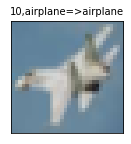

In [ ]:
plot_images_labels_prediction(x_img_test,y_label_test,prediction,idx=10,num=1)

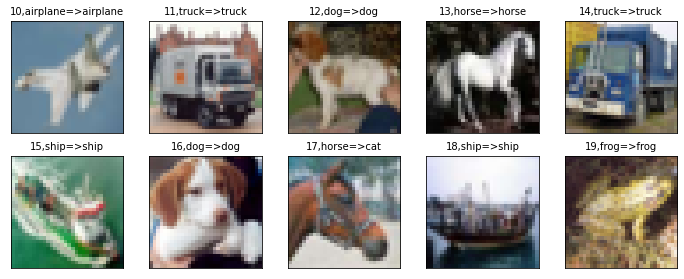

In [ ]:
plot_images_labels_prediction(x_img_test,y_label_test,prediction,idx=10,num=10)

# 查看預測機率

In [ ]:
def show_predicted_probability(
    images,labels,prediction,probability,idx):
  plt.figure(figsize=(1,1));
  plt.xticks([]);plt.yticks([])
  plt.imshow(images[idx],cmap='binary')
  plt.show()
  print('label:',label_dict[labels[idx]],
     'predict:',label_dict[prediction[idx]]) 
  for i in range(10):
    print('%-10s Probability:%.9f'%(label_dict[i],probability[idx][i]))      

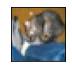

label: cat predict: cat
airplane   Probability:0.000289021
automobile Probability:0.000365551
bird       Probability:0.000438168
cat        Probability:0.814032495
deer       Probability:0.003382550
dog        Probability:0.161354959
frog       Probability:0.017493701
horse      Probability:0.000280003
ship       Probability:0.002329652
truck      Probability:0.000033952


In [ ]:
show_predicted_probability(x_img_test,y_label_test,prediction,probability,0) 

# confusion matrix

In [ ]:
import pandas as pd

In [ ]:
pd.crosstab(y_label_test,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,764,21,24,21,46,10,14,16,51,33
1,14,882,5,7,5,7,9,6,16,49
2,78,14,394,59,200,78,115,44,12,6
3,16,20,43,473,129,155,98,43,16,7
4,16,6,30,24,783,23,64,41,11,2
5,10,6,24,140,89,625,37,60,6,3
6,2,7,24,37,70,19,835,1,4,1
7,13,3,18,26,98,50,12,775,2,3
8,74,60,4,16,22,10,14,6,778,16


In [ ]:
df = pd.DataFrame({'label':y_label_test, 'predict':prediction})

In [ ]:
df[:5]

,label,predict
0,3,3
1,8,8
2,8,8
3,0,0
4,6,6


In [ ]:
df[(df.label==5)&(df.predict==3)]

,label,predict
33,5,3
128,5,3
158,5,3
230,5,3
232,5,3
...,...,...
9649,5,3
9657,5,3
9823,5,3
9928,5,3


# 查看預測錯誤資料

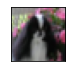

label: dog predict: horse
airplane   Probability:0.000122556
automobile Probability:0.000550338
bird       Probability:0.002088423
cat        Probability:0.292204112
deer       Probability:0.002005499
dog        Probability:0.336597174
frog       Probability:0.000069223
horse      Probability:0.342474997
ship       Probability:0.001381840
truck      Probability:0.022505814


In [ ]:
show_predicted_probability(x_img_test,y_label_test,prediction,probability,42)

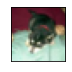

label: dog predict: cat
airplane   Probability:0.037445951
automobile Probability:0.010466983
bird       Probability:0.008468694
cat        Probability:0.511098742
deer       Probability:0.051616479
dog        Probability:0.243940234
frog       Probability:0.135898992
horse      Probability:0.000878159
ship       Probability:0.000072722
truck      Probability:0.000113023


In [ ]:
show_predicted_probability(x_img_test,y_label_test,prediction,probability,128)

#建立儲存模型路徑

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
def Save_model_to_gdrive(model_dir,model_name): 
  path= model_dir+model_name
  os.makedirs(path,exist_ok=True) 
  try:
    model_json = model.to_json()  
    with open(path+"structure.json","w") as json_file:
      json_file.write(model_json)
    model.save(path+"whole.h5",save_format='h5')    
  except: 
    print('No structure')
  model.save(path+"SavedModel",save_format='tf')  
  model.save_weights(path+"weight.h5")    
  os.system("cp -r Model drive/MyDrive")  

In [ ]:
Save_model_to_gdrive(model_dir='Model/',model_name='CifarCNN/')

INFO:tensorflow:Assets written to: Model/CifarCNN/SavedModel/assets


In [ ]:
ls -l drive/MyDrive/Model

total 16038
-rw------- 1 root root 16410384 Mar 12 05:57 Cifar_C5P1_ErAuBn.h5
drwx------ 3 root root     4096 May 30 02:44 CifarCNN/
drwx------ 2 root root     4096 Feb  2 14:35 CifarCNNFunc/
drwx------ 2 root root     4096 Mar 20 08:54 CifarCNNSub/


In [ ]:
ls -l drive/MyDrive/Model/CifarCNN/

total 8590
drwx------ 4 root root    4096 May 30 02:44 SavedModel/
-rw------- 1 root root    2777 May 30 02:44 structure.json
-rw------- 1 root root 2201576 May 30 02:44 weight.h5
-rw------- 1 root root 6586824 May 30 02:44 whole.h5
